# Data Visualization in Matplotlib
<br>**Tools used:** matplotlib, pandas, numpy, seaborn;
<br>**Types of charts plotted:** line graphs, area graphs, histograms, bar plots, pie charts, box plots, scatter plot, regression  line.

## 1. Loading Data for Visualization

In [23]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [24]:
print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.3.2


In [25]:
print('Seaborn version: ', sns.__version__)

Seaborn version:  0.11.0


In [26]:
print(plt.style.available)# different plotting styles available in matplotlib
mpl.style.use(['ggplot']) # for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Loading Data Set (The Dataset: Immigration to Canada from 1980 to 2013) from 
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01

In [27]:
url = "http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01"
df = pd.read_excel( "Canada.xlsx",
                   sheet_name='Canada by Citizenship',
                   skiprows=range(20),
                   skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [28]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


Preprocessing the Data

In [29]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df['Total'] = df.sum(axis=1)
df.set_index('Country', inplace = True) # change index to column Country for the ease of access
df.index.name = None # remove name of the index
df.columns = list(map(str, df.columns)) # converting column names to str data type


In [30]:
df.isnull().sum() # number of NULL objects in each column

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [31]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## 2. Plotting Line Graphs

In [32]:
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


Plotting a line graph of immigration from Haiti 

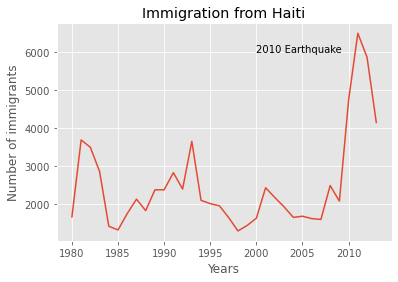

In [33]:
years = df.columns.values[3:-1] # selecting columns from '1980' up to '2013'
haiti = df.loc['Haiti', years] #pandas Series object
haiti.plot(kind = 'line' )
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
# adding details to the Graph
plt.text(20, 6000, '2010 Earthquake') # see note below
plt.show()

 Let's compare the number of immigrants from India and China from 1980 to 2013.

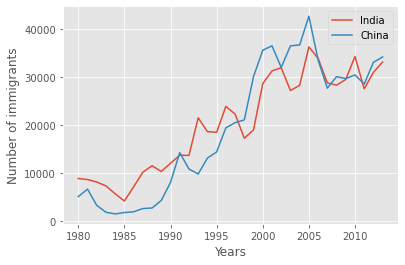

In [34]:
India_China_immig = df.loc[['India', 'China'], years].transpose()
India_China_immig.plot(kind = 'line')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

## 3. Plotting Area Graphs

Comparing the trend of top 5 countries that contributed the most to immigration to Canada
using Area Plot.

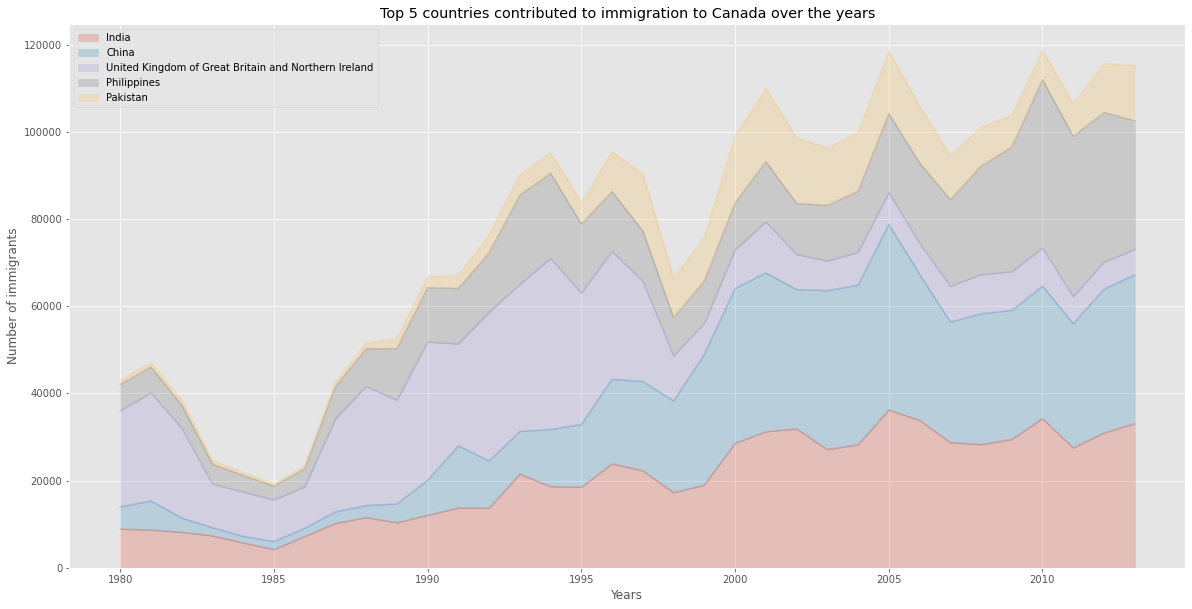

In [35]:
top_5_countries_names = df['Total'].sort_values(ascending = False).index.values[:5]
comparison_of_5_countries = df.loc[top_5_countries_names, years].transpose()
comparison_of_5_countries.plot(kind = 'area', stacked=True, figsize = (20,10), alpha=0.25)
plt.title('Top 5 countries contributed to immigration to Canada over the years')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

### Plotting using  Artist layer (Object oriented method) - using an Axes instance from Matplotlib (more flexible method). Previously we used scripting layer (procedural method) - using matplotlib.pyplot

Unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013

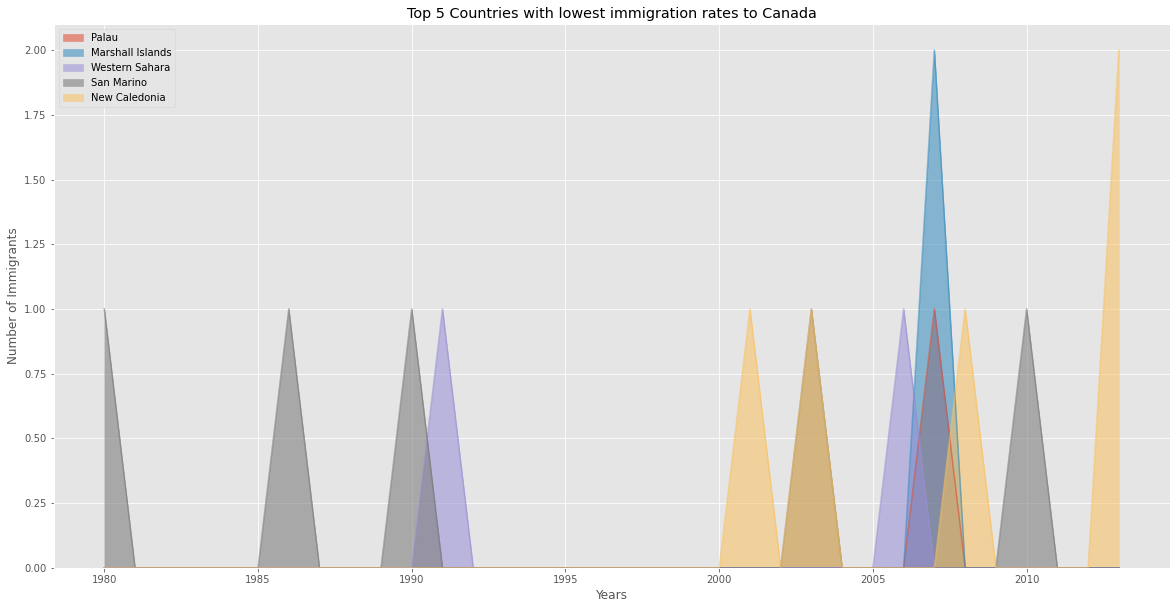

In [36]:
countries_low_immigration = df.sort_values(['Total'], ascending = True).head(5)[years]
# comparison_of_5_countries = df.loc[top_5_countries_names, years].transpose()
ax = countries_low_immigration.transpose().plot(kind = 'area', stacked=False, figsize = (20,10), alpha=0.55)
# adding elements
ax.set_title('Top 5 Countries with lowest immigration rates to Canada')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()

Frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013

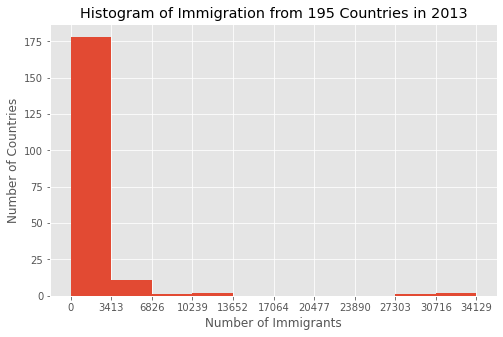

In [37]:
count, bin_edges = np.histogram(df['2013'], bins = 10) # breaks up the dataset into 10 bins (by default)
df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

### Multiple histograms on the same plot

Immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013

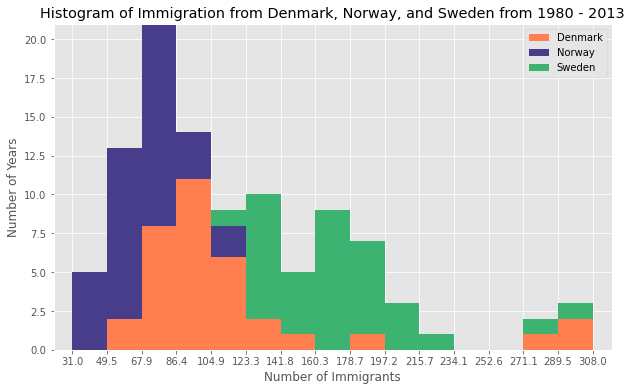

In [38]:
df_temp = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
count, bin_edges = np.histogram(df_temp, 15)
xmin = bin_edges[0] - 10   # adding  10 to the left edge for aesthetic purposes 
xmax = bin_edges[-1] + 10  # adding  10 to the right edge for aesthetic purposes 
df_temp.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          xlim = (xmin, xmax),
          stacked = True
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Bar charts

Comparing the number of Icelandic immigrants to Canada from year 1980 to 2013

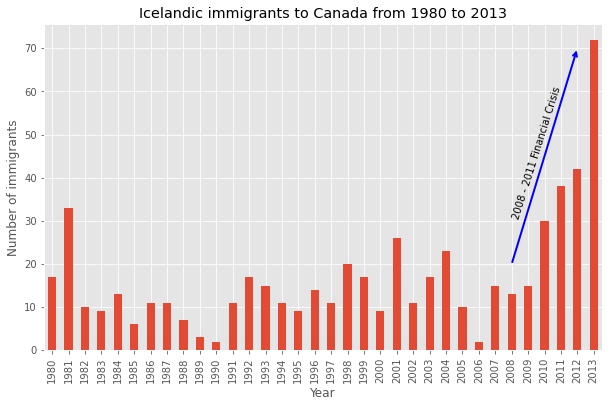

In [39]:
df_iceland = df.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6), rot = 90)

plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 
# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

### Horisontal Bar Plot

The total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013

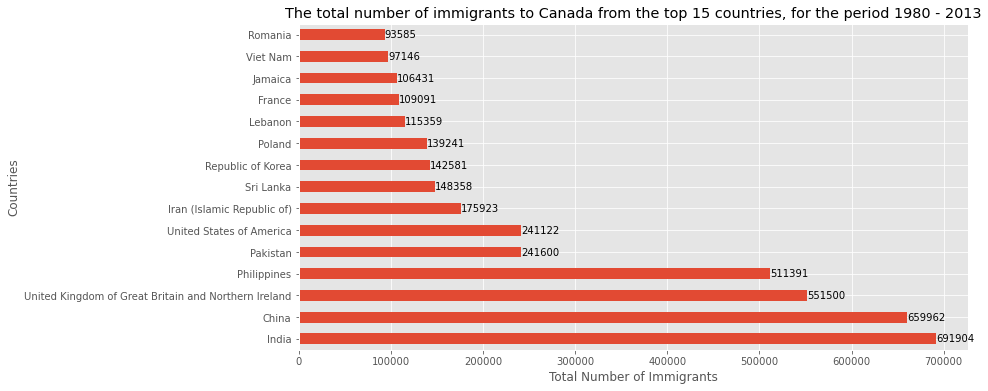

In [40]:
df_top_15 = df.sort_values(['Total'], ascending = False).head(15)
df_top_15['Total'].plot(kind = 'barh', figsize = (12,6))
for i, country_total in enumerate (df_top_15['Total'].values):
    plt.annotate(country_total, xy = (country_total, i), va = "center")
plt.title("The total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013") 
plt.xlabel("Total Number of Immigrants")
plt.ylabel("Countries")
plt.show()

## 4. Pie Charts, Box Plots, and Scatter Plots

### Pie Chart

Exploring the proportion of new immigrants grouped by continents for the entire time period from 1980 to 2013

In [41]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


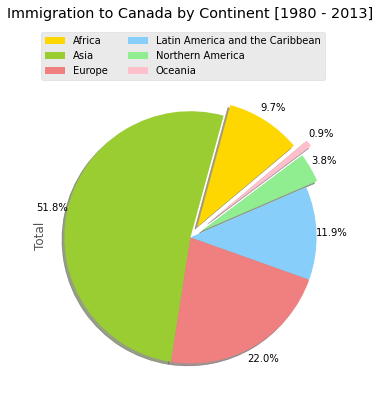

In [42]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each continent with which to offset each wedge to emphasize the lowest three continents
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] 
df_continents['Total'].plot(kind = 'pie', startangle = 40,figsize = (5, 6), labels=None, colors=colors_list,
                            autopct = '%1.1f%%', # add in percentages
                            pctdistance=1.12, # push out the percentages to sit just outside the pie chart
                            explode=explode_list,
                            shadow=True
                           )
plt.title('Immigration to Canada by Continent [1980 - 2013]', y = 1.15)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index,  bbox_to_anchor=(1, 1.14), ncol = 2) 
plt.show()

###  Box Plot

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

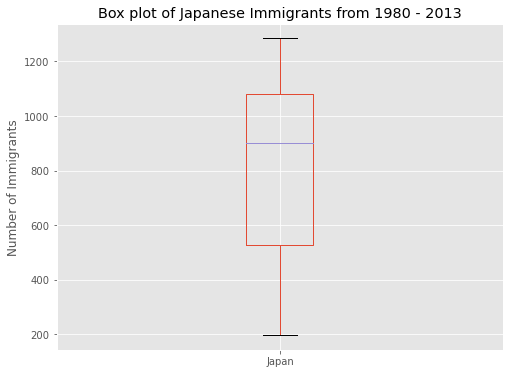

In [43]:
pd_series_japan = df.loc['Japan', years] # pandas' Series object
pd_series_japan.plot(kind = 'box', figsize=(8, 6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()


### Comparing numeric variables for different categories using box plots

Comparing the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [44]:
df_immigrants_India_China = df.loc[['India','China'], years].transpose()
df_immigrants_India_China.head(2)

,India,China
1980,8880,5123
1981,8670,6682


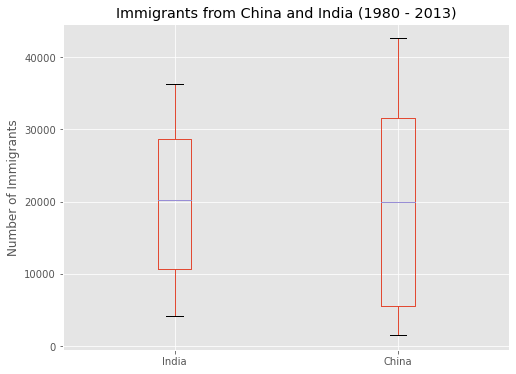

In [45]:
df_immigrants_India_China.plot(kind = 'box', figsize = (8, 6))
plt.title('Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

 Visualizing the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s

In [46]:
df_top15_by_decades = pd.DataFrame()
df_top15_by_decades['1980s'] = df_top_15[years[0:10]].sum(axis =1)
df_top15_by_decades['1990s'] = df_top_15[years[10:20]].sum(axis =1)
df_top15_by_decades['2000s'] = df_top_15[years[20:30]].sum(axis =1)
df_top15_by_decades.index.name = 'Country'
df_top15_by_decades.head(2)

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


In [47]:
df_top15_by_decades.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


In [48]:
type(df_top15_by_decades.columns.values[0])

str

In [49]:
# Let's find the names of the countries which are outliers
top15_statistics = df_top15_by_decades.describe()
IQR = top15_statistics.loc['75%'] - top15_statistics.loc['25%'] # the interquartile range (IQR)
max_values = top15_statistics.loc['75%'] + 1.5*IQR # outliers > 1.5*IQR + 75%-quartile
outliers_1980s =  df_top15_by_decades[ df_top15_by_decades['1980s'] > max_values['1980s'] ].index.values
outliers_1990s =  df_top15_by_decades[ df_top15_by_decades['1990s'] > max_values['1990s'] ].index.values
outliers_2000s =  df_top15_by_decades[ df_top15_by_decades['2000s'] > max_values['2000s'] ].index.values

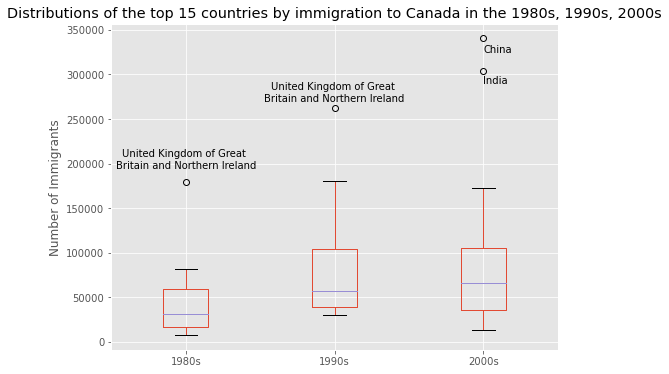

In [50]:
# Box plots
df_top15_by_decades.plot(kind = 'box', figsize = (8,6))
plt.title('Distributions of the top 15 countries by immigration to Canada in the 1980s, 1990s, 2000s')
plt.ylabel('Number of Immigrants')
# Naming Outliers
# Converting names
line = outliers_1980s[0]
index = line.find('Britain') 
outlier_name = line[:index] + '\n' + line[index:]
plt.text(1,195000, outlier_name, ha = 'center')
plt.text(2,270000, outlier_name, ha = 'center')
plt.text(3,290000, outliers_2000s[0], ha = 'left')
plt.text(3,325000, outliers_2000s[1], ha = 'left')
plt.show()

### Scatter Plots

Visualizing the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [51]:
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(int, df_tot.index) # converting years to int for plotting 
df_tot.reset_index(inplace = True) # index as column
df_tot.columns = ['year', 'total'] # rename columns
df_tot.head(2)

,year,total
0,1980,99137
1,1981,110563


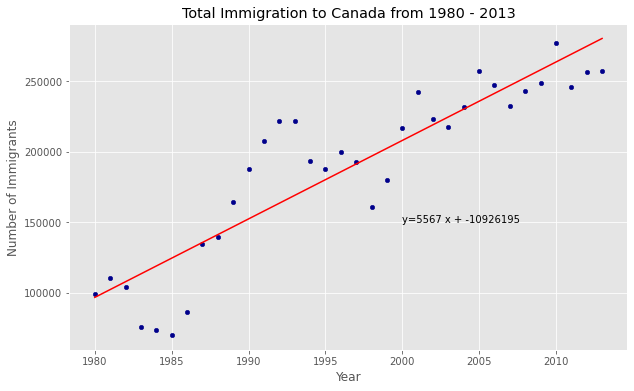

In [52]:
# fitting the linear regression model
x = df_tot['year'] 
y = df_tot['total'] 
fit = np.polyfit(x, y, deg=1)
# Scatter Plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# Plot Regression Line
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()


# 5. Subplots (Artirst Level of Matplotlib)

Analysis of the number of new immigrants from India and China for the period 1980 - 2013 using Box Plot and Line Plot

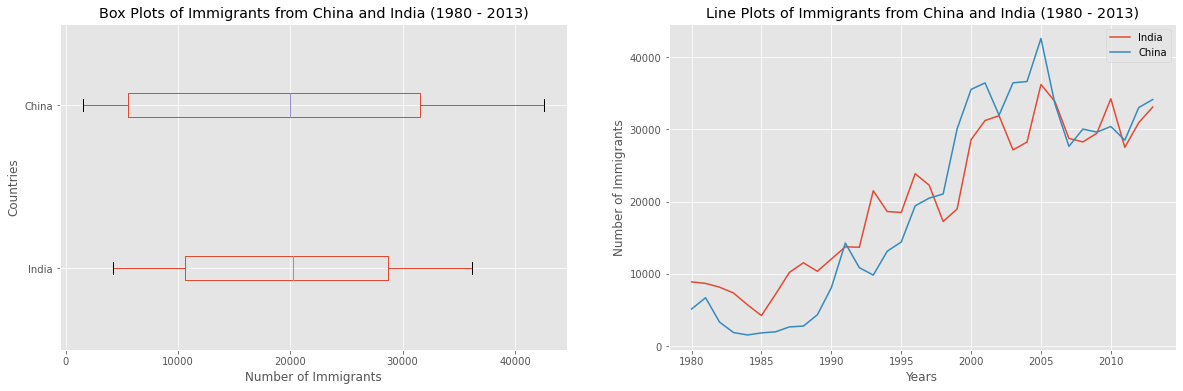

In [53]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(122) # shorthand for subplot(1, 2, 2)
df_immigrants_India_China.plot(kind = 'box', figsize=(20, 6), vert = False, ax = ax1)
# adding details to ax1 
ax1.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Countries')
df_immigrants_India_China.plot(kind = 'line', ax = ax2, figsize=(20,6))
# adding details to ax2
ax2.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax2.set_ylabel('Number of Immigrants')
ax2.set_xlabel('Years')
plt.show()

# 6. Scatter Plot + Regression Line in the Seaborn

 The total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

In [54]:
pd_series_temp = df.loc[['Denmark', 'Norway', 'Sweden'], years].sum(axis = 0)
df_scandinavian_immiration = pd.DataFrame(pd_series_temp)
df_scandinavian_immiration.index = map(int, df_scandinavian_immiration.index) # converting to int
df_scandinavian_immiration.reset_index(inplace = True)
df_scandinavian_immiration.columns = ['year', 'total']
df_scandinavian_immiration.head(2)

,year,total
0,1980,669
1,1981,678


The total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [55]:
df_tot.head(2)

,year,total
0,1980,99137
1,1981,110563


Let's plot side by side the total immigration of all countries included and immigration from scandinavian countries only.

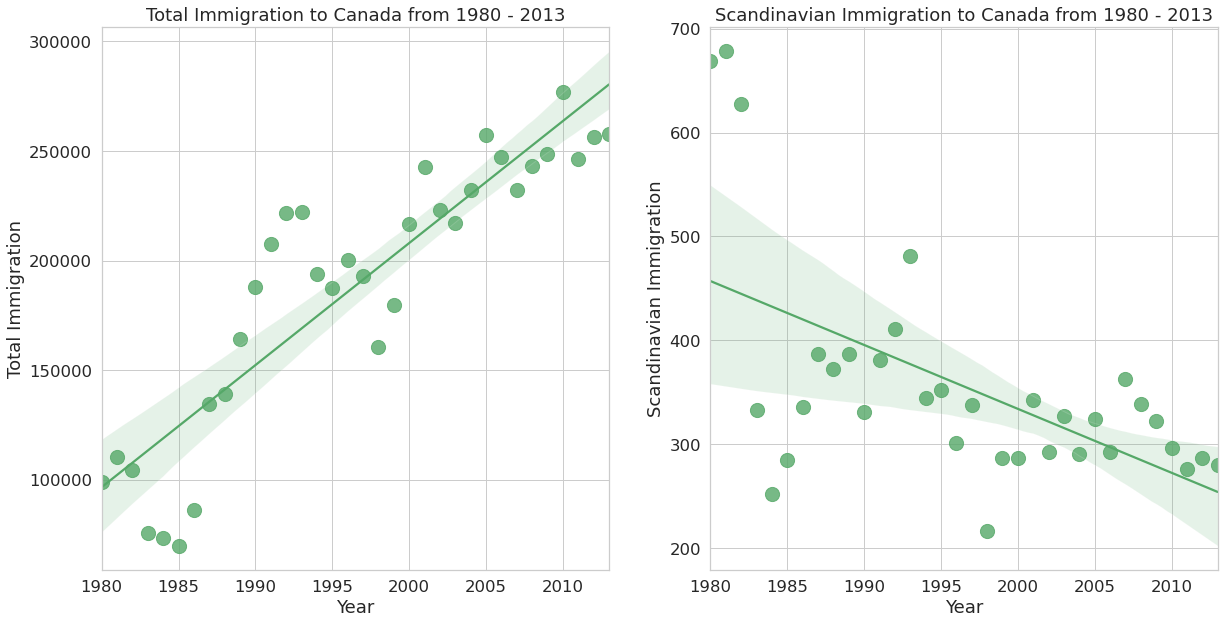

In [56]:
fig = plt.figure(figsize=(20, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax1 = fig.add_subplot(121)

sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'g', marker ='o', scatter_kws={'s': 200}, ax = ax1) 
ax1.set(xlabel='Year', ylabel='Total Immigration') 
ax1.set_title('Total Immigration to Canada from 1980 - 2013') 

ax2 = fig.add_subplot(122)

sns.regplot(x = 'year', y = 'total', data = df_scandinavian_immiration, color = 'g', marker ='o', scatter_kws={'s': 200}, ax = ax2) 
ax2.set(xlabel='Year', ylabel='Scandinavian Immigration') 
ax2.set_title('Scandinavian Immigration to Canada from 1980 - 2013')

plt.show()

In [57]:
s = "ab cd"
line = 'Kong Panda'
index = line.find('Panda')

print(index)

5
